# **Project Name**    -





##### **Project Type**    - EDA on Global Terrorism Dataset
##### **Submited by**    - Raj Tiwari



# **Project Summary -**


The Global Terrorism Data Analysis project aims to comprehensively examine the Global Terrorism Database (GTD) to understand the patterns, causes, and impacts of terrorism worldwide. This project involves meticulous data cleaning and preprocessing to ensure the quality and consistency of the dataset, which includes terrorist incidents from 1970 to the 2017. Through descriptive statistics, time-series analysis, and geospatial mapping, the project identifies significant temporal trends and geographical hotspots of terrorist activities. It profiles terrorist groups, analyzing their frequency of attacks, geographical reach, target preferences, and evolution of tactics. Additionally, the project assesses the human, economic, and social impacts of terrorism, highlighting the substantial casualties, economic disruptions, and psychological effects on affected populations. Key findings reveal a rise in global terrorism incidents from the 2000s, with notable hotspots in the Middle East, South Asia, and Africa. The project underscores the importance of continued data collection and analysis to develop effective counterterrorism strategies and mitigate the impacts of terrorism on global security and human welfare.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


 systematically investigate the Global Terrorism Database (GTD) to uncover significant trends, patterns, and anomalies in global terrorist activities. The project seeks to address the lack of comprehensive understanding regarding the temporal and geographical distribution of terrorism, the profiles of perpetrators and targets, and the evolving tactics used in terrorist attacks. By analyzing this data, the project aims to provide actionable insights that can inform effective counterterrorism strategies, policy-making, and further research to enhance global security and mitigate the impacts of terrorism on societies worldwide.

#### **Define Your Business Objective?**

The objective is to analyze global terrorism data to uncover trends, patterns, and impacts, informing effective counterterrorism strategies and policies.Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Dataset Loading

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/MyDrive/ALMABETTER DATA/DataFiles/Global Terrorism Data.csv', encoding='latin-1')

**bold text**### Dataset First View

In [37]:
# Dataset First Look

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [38]:
# Dataset Rows & Columns count

#no of rows = 181691
# no of columns = 135

df.shape

(181691, 135)

### Dataset Information

In [39]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [40]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [41]:

pd.set_option('display.max_colwidth', 135)

#setting the columns display 135


In [42]:
terror = df[['eventid','iyear','imonth','iday','country_txt','region_txt','provstate','city','summary','success','suicide','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','suicide','nwound','nkill']]


In [43]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'summary', 'success', 'suicide', 'attacktype1_txt',
       'targtype1_txt', 'gname', 'weaptype1_txt', 'suicide', 'nwound',
       'nkill'],
      dtype='object')

In [44]:
terror.shape

(181691, 18)

#### Duplicate Values

In [45]:
# Dataset Duplicate Value Count

terror.duplicated().sum()

# no duplicates record found

0

In [46]:
#renaming the columns from terror dataframe for our covinence

terror = terror.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attacktype','targtype1_txt':'targettype','gname':'organisation','weaptype1_txt':'weapontype','nwound':'wound','nkill':'kill'})

#### Missing Values/Null Values

In [47]:
terror.isna().sum()

eventid             0
year                0
month               0
day                 0
country             0
region              0
provstate         421
city              435
summary         66129
success             0
suicide             0
attacktype          0
targettype          0
organisation        0
weapontype          0
suicide             0
wound           16311
kill            10313
dtype: int64

In [48]:
# Missing Values/Null Values Count
terror['provstate'] = terror['provstate'].fillna('unknown')
terror['summary'] = terror['summary'].fillna('unknown')
terror['kill'] = terror['kill'].fillna(0)
terror['wound'] = terror['wound'].fillna(0)
terror['organisation'] = terror['organisation'].fillna('unknown')
terror['weapontype'] = terror['weapontype'].fillna('unknown')
terror['city'] = terror['city'].fillna('unknown')


### What did you know about your dataset?

In [49]:
# Visualizing the missing values
terror.isna().sum()

eventid         0
year            0
month           0
day             0
country         0
region          0
provstate       0
city            0
summary         0
success         0
suicide         0
attacktype      0
targettype      0
organisation    0
weapontype      0
suicide         0
wound           0
kill            0
dtype: int64

Answer Here

## ***2. Understanding Your Variables***

In [50]:
# Dataset Columns

terror.columns

Index(['eventid', 'year', 'month', 'day', 'country', 'region', 'provstate',
       'city', 'summary', 'success', 'suicide', 'attacktype', 'targettype',
       'organisation', 'weapontype', 'suicide', 'wound', 'kill'],
      dtype='object')

In [51]:
# we are checking the datatypes of the terror data frame

terror.dtypes


eventid           int64
year              int64
month             int64
day               int64
country          object
region           object
provstate        object
city             object
summary          object
success           int64
suicide           int64
attacktype       object
targettype       object
organisation     object
weapontype       object
suicide           int64
wound           float64
kill            float64
dtype: object

In [52]:
# Dataset Describe
# here we are describing the new dataframe terror we have created from the base data

terror.describe()

,eventid,year,month,day,success,suicide,suicide,wound,kill
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.889598,0.036507,0.036507,2.883296,2.266860
std,1.325957e+09,13.259430,3.388303,8.814045,0.313391,0.187549,0.187549,34.309747,11.227057
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,1.000000,0.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,8191.000000,1570.000000


### Variables Description

**eventid**: A unique identifier for each terrorism event.

**year**: The year in which the terrorism event occurred.

**month**: The month in which the terrorism event occurred.

**day**: The day of the month when the terrorism event occurred.

**country**: The country where the terrorism event took place.

**region**: The region where the terrorism event occurred.

**provstate**: The province or state within the country where the event occurred.

**city**: The city where the terrorism event occurred.

**summary**: A brief summary or description of the terrorism event.

**success**: A binary indicator (0 or 1) indicating whether the attack was successful.

**suicide**: A binary indicator (0 or 1) indicating whether the attack was a suicide attack.

**attacktype**: The type of attack (e.g., bombing, armed assault).
targettype: The general type of target attacked (e.g., military, civilian).

**organisation**: The terrorist organization responsible for the attack.
weapontype: The type of weapon used in the attack.

**wound**: The number of people wounded in the attack.

**kill**: The number of people killed in the attack.

In [53]:
#checking the shape of the new dataframe

terror.shape

(181691, 18)

### Check Unique Values for each variable.



In [54]:
# Check Unique Values for each variable.
terror.columns.unique()

Index(['eventid', 'year', 'month', 'day', 'country', 'region', 'provstate',
       'city', 'summary', 'success', 'suicide', 'attacktype', 'targettype',
       'organisation', 'weapontype', 'wound', 'kill'],
      dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [59]:
# Write your code to make your dataset analysis ready.

terror.head()

,eventid,year,month,day,country,region,provstate,city,summary,success,suicide,attacktype,targettype,organisation,weapontype,suicide,wound,kill
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,unknown,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,0,0.0,1.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,unknown,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0,0.0,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,0,0.0,1.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,unknown,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0,0.0,0.0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,unknown,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0,0.0,0.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

array([[<Axes: title={'center': 'eventid'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'success'}>,
        <Axes: title={'center': 'suicide'}>],
       [<Axes: title={'center': 'suicide'}>,
        <Axes: title={'center': 'wound'}>,
        <Axes: title={'center': 'kill'}>]], dtype=object)

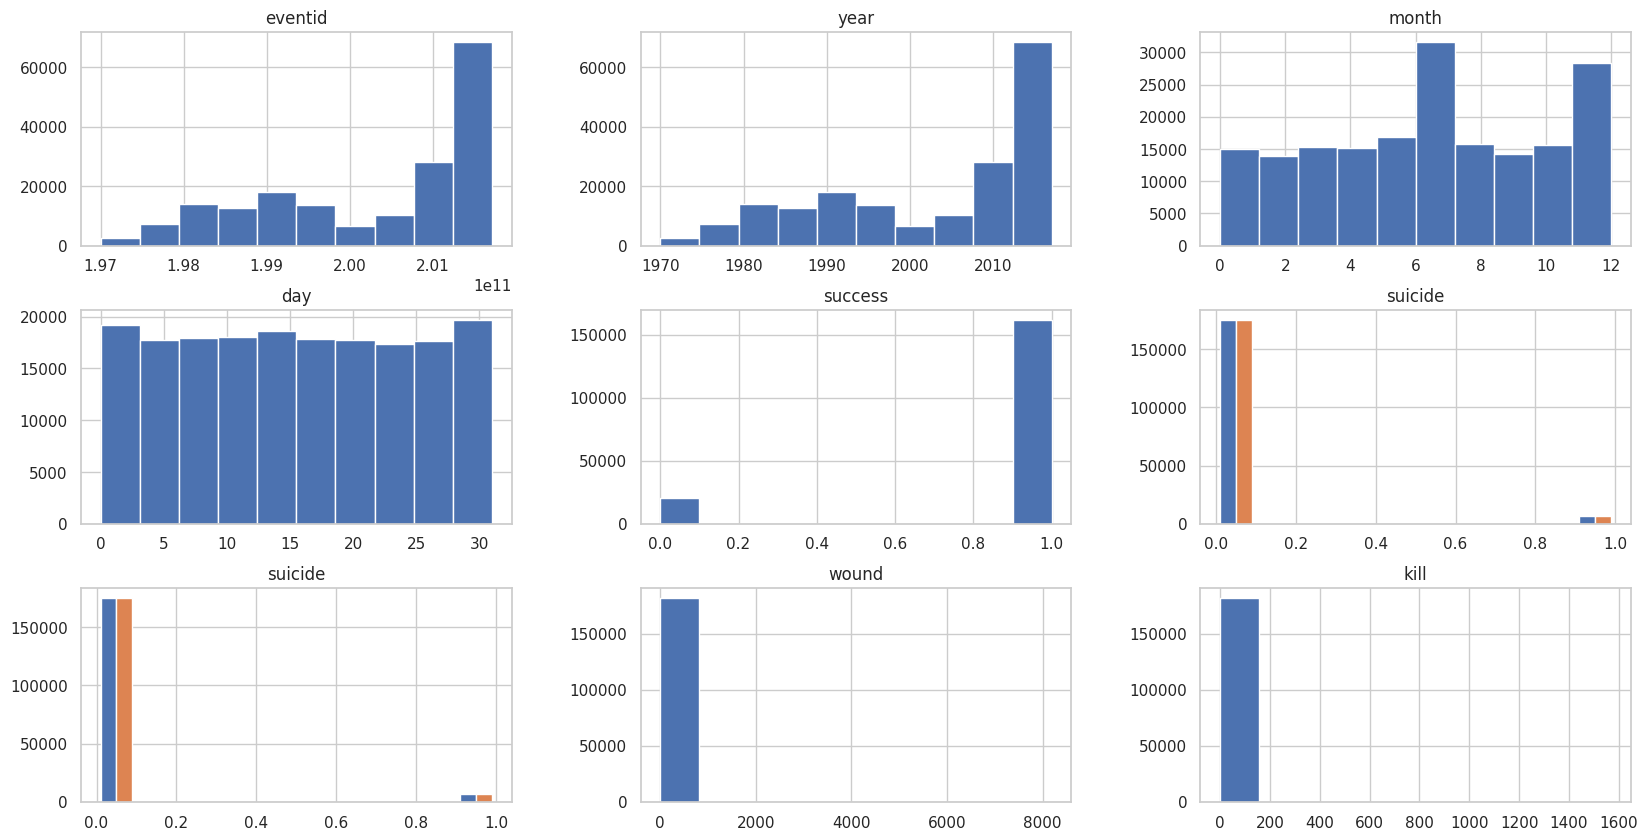

In [56]:
# Chart - 1 visualization code

terror.hist(figsize=(20,10))

##### 1. Why did you pick the specific chart?

Histograms allow us to see the distribution of data within each numerical column. For instance, we can see if the data is normally distributed, skewed, or has outliers.

By generating histograms for all numerical columns in a single figure, we can easily compare the distributions across different variables.


##### 2. What is/are the insight(s) found from the chart?

1. The histogram of the year column may show peaks in certain years, indicating periods with higher frequencies of terrorist attacks.from histogram we can conclude that

2.The success column histogram, typically binary, will show the proportion of successful vs. unsuccessful attacks.

3.The suicide column histogram, also binary, will indicate the frequency of suicide attacks versus non-suicide attacks.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Enhanced Security Measures:

-->Insight: Identifying trends in the success rate of attacks.
-->Impact: Businesses, especially those in high-risk areas, can invest in improved security protocols during identified peak periods of activity (e.g., certain years or months). Enhanced security can prevent disruptions, protect assets, and ensure business continuity.

-->Insight: Recognizing geographical hotspots and specific targets of attacks.
-->Impact: Companies can allocate resources more effectively, focusing on high-risk areas and specific vulnerable targets. This can reduce potential losses and safeguard employees and infrastructure, contributing to a safer business environment and improved employee morale

#### Chart - 2

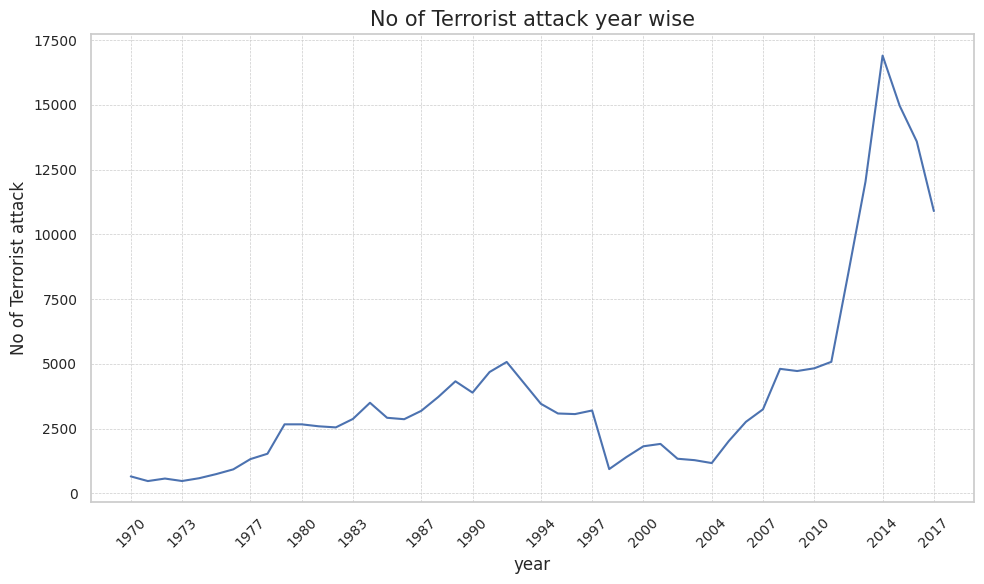

In [60]:


# Chart - 2  visualization code

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

# Create a line plot
sns.lineplot(x = terror.year.value_counts().index, y= terror.year.value_counts().values)

# Set plot labels and title
plt.xlabel('year',fontsize = 12)
plt.ylabel('No of Terrorist attack',fontsize = 12)
plt.title('No of Terrorist attack year wise', fontsize = 15)

# Define tick values for x-axis
tick_values = np.linspace(terror['year'].min(),terror['year'].max(),15)
tick_values = np.round(tick_values).astype(int)

# Set x-ticks and rotate labels for better readability
plt.xticks(tick_values,rotation = 45,fontsize = 10)
plt.yticks(fontsize = 10)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

it shows the trend of terrorist attack over the years from 1970 to 2017

##### 2. What is/are the insight(s) found from the chart?

2013 and 2014 has a large number of Terrorist activites

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

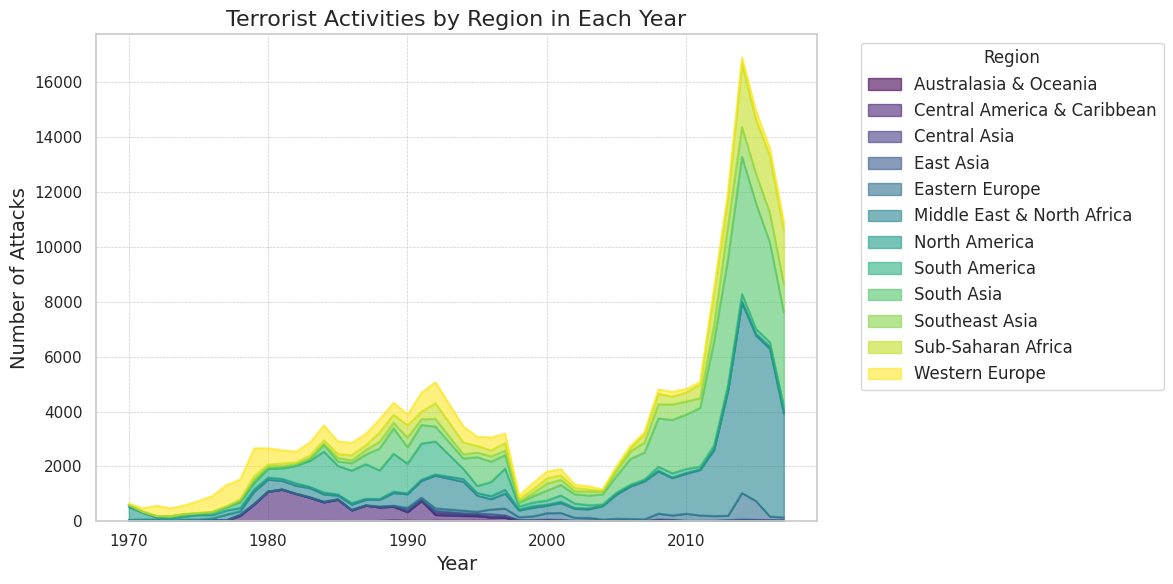

In [58]:
# Chart - 3 visualization code

# Plot the cross-tabulation as an area plot
pd.crosstab(terror.year,terror.region).plot(kind = 'area',figsize=(12,6), alpha =0.6, colormap='viridis')

# Set the title and axis labels
plt.title("Terrorist Activities by Region in Each Year", fontsize=16)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend with a title, positioned outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc= 'upper left', fontsize=12)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

1.Cumulative Visualization:

2.Trend Identification:

3.Comparison Across Regions:

4.Visual Clarity and Appeal

**Conclusion**  
Choosing an area plot to visualize terrorist activities by region over the years provides a comprehensive, clear, and comparative view of the data.

##### 2. What is/are the insight(s) found from the chart?

western europe and sub saharan africa has tremendous increase in the terrorist activities


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the analysis of terrorist activities provides critical insights for risk management and strategic planning, it also highlights significant challenges that can negatively impact business growth. Increased operational costs, market aversion, negative perceptions, and supply chain disruptions are key factors that can hinder economic development and business expansion in regions plagued by terrorism. Balancing these insights to mitigate risks while fostering growth is essential for businesses operating in such environments.








**ANALYSIS** :

how much percentage increase the terrorist activities from 2011 to 2014 as from the graph we can see there is drastically increase in the terrorist activites

In [ ]:
# Count the number of terrorist attacks per year and convert to dictionary
year = terror.year.value_counts().to_dict()

# Calculate the percentage increase from 2011 to 2014
per_rate = round(((year[2014]-year[2011])/year[2011])*100,2)

# Print the result
print(f"in 2011 the no of attacks are {year[2011]} and in year 2014 no of attacks are {year[2014]} so there is {per_rate} % increase ")

in 2011 the no of attacks are 5076 and in year 2014 no of attacks are 16903 so there is 233.0 % increase 


#### Chart - 4

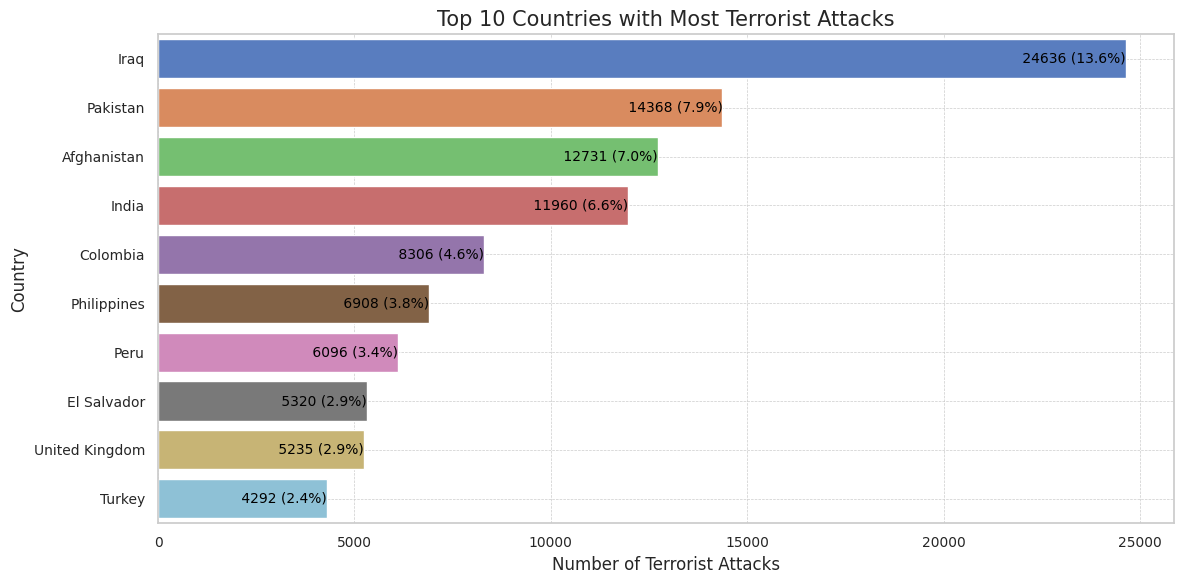

In [ ]:
# Chart - 4 visualization code
# Suppressing warnings
warnings.filterwarnings("ignore")

# Calculating total number of attacks
total_attacks = terror['country'].value_counts().sum()

# Selecting top 10 countries with the most terrorist attacks
top_countries = terror['country'].value_counts().head(10)

# Calculating the percentage of attacks for each top country
top_countries_perc = (top_countries / total_attacks) * 100

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')

# Adding annotations to the bars
# zip function take the two list and combine them into tuples
for i, (value, perc) in enumerate(zip(top_countries.values, top_countries_perc)):
    ax.text(value, i, f' {value} ({perc:.1f}%)', va='center', ha='right', fontsize=10, color='black')

# Adding title and labels
plt.title('Top 10 Countries with Most Terrorist Attacks', fontsize=15)
plt.xlabel('Number of Terrorist Attacks', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Adjusting tick labels and grid lines
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Ensuring layout fits well
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

**Purpose**: The data being visualized is categorical (country names) with corresponding numerical values (number of attacks).

**Impact**: Bar plots are well-suited for displaying categorical data, as each bar represents a distinct category (country) and its length corresponds to the numerical value (attacks).

**Aesthetic and Informative**

##### 2. What is/are the insight(s) found from the chart?

Iraq experienced a total of 2,436 terrorist attacks, which constitutes 13.6% of the global total. In contrast, Pakistan recorded 14,368 terrorist attacks, accounting for 7.9% of the total attacks worldwide.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed, based on this analysis, it is evident that certain regions experience a higher frequency of terrorist attacks. Consequently, it is imperative to enhance security measures in these areas to mitigate the impact or occurrence of such activities.

#### Chart - 5

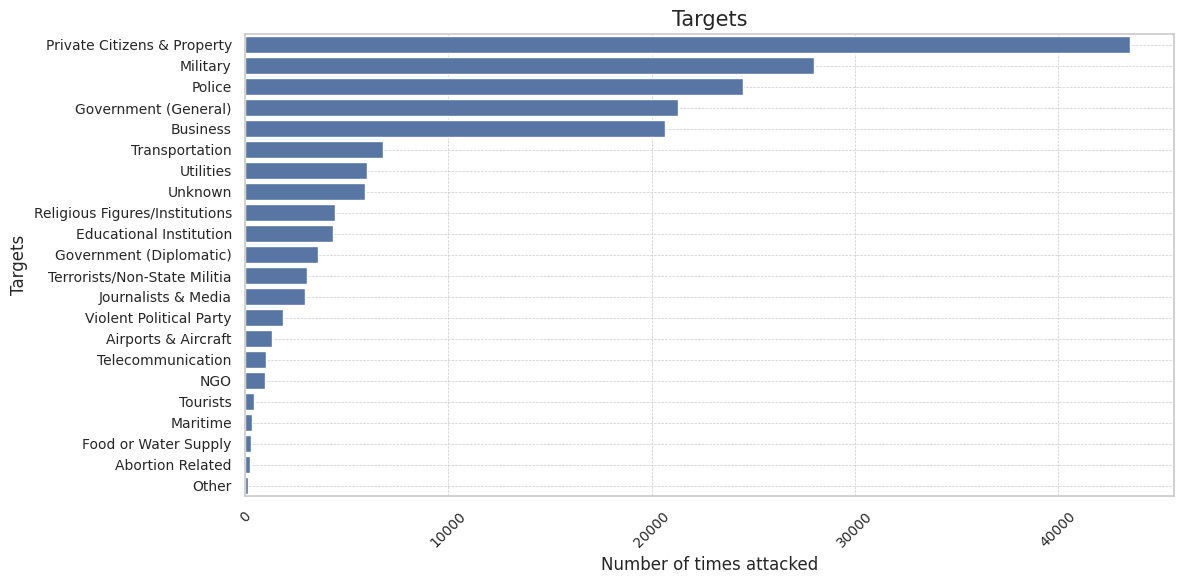

In [ ]:
# Chart - 5 visualization code

warnings.filterwarnings("ignore")

target_type = terror.targettype.value_counts()

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.barplot(x= target_type.values, y= target_type.index)

plt.title('Targets',fontsize = 15)
plt.xlabel('Number of times attacked',fontsize = 12)
plt.ylabel('Targets', fontsize = 12)

plt.yticks(fontsize = 10)
plt.xticks(rotation = 45,fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 Indeed, bar charts are optimal for visualizing categorical data due to their inherent ability to provide clarity and facilitate comparison. Their straightforward representation, where the length of each bar corresponds directly to the value it represents, ensures ease of understanding. Additionally, the familiarity of bar charts to a broad audience enhances accessibility, making them easily interpretable by stakeholders, decision-makers, and the general public alike. Therefore, for presenting categorical data such as the frequency of terrorist attacks across different targets, bar charts stand out as an ideal choice, offering a balance of clarity, comparison, and accessibility.

```
# This is formatted as code
```



##### 2. What is/are the insight(s) found from the chart?

Private citizens and property, as well as military targets, have been subjected to the highest number of attacks, with 43,511 and 27,984 incidents, respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Upon identifying the components predominantly targeted in terrorist attacks, informed strategic interventions can be implemented to nullify such operations effectively. This entails deploying tailored measures to bolster security and fortify defenses around these critical components, thereby mitigating the risk of terrorist activities. By adopting proactive measures informed by these insights, authorities can enhance surveillance, enact stringent security protocols, and allocate resources judiciously to safeguard vulnerable targets and thwart potential terrorist threats. This systematic approach ensures a comprehensive response aimed at neutralizing terrorist operations and safeguarding the integrity and security of targeted components and the broader populace.

#### Chart - 6

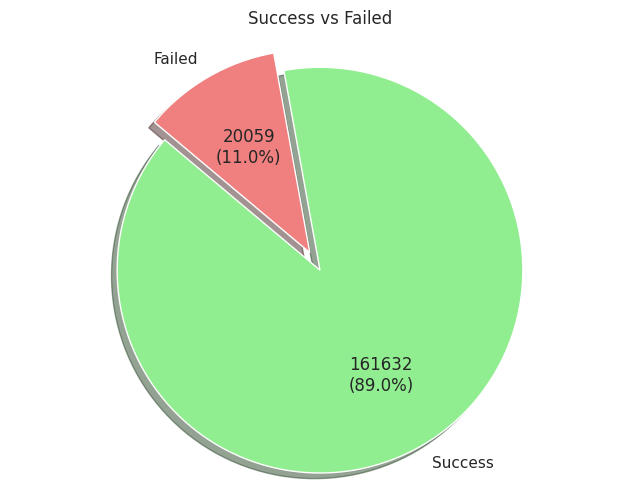

In [ ]:
# Chart - 6 visualization code

success = len([i for i in terror.success if i == 1])
failed = len([i for i in terror.success if i != 1])

# Data to plot
labels = ['Success', 'Failed']
sizes = [success, failed]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (Success)

# Lambda function to display both the count and percentage
autopct = lambda pct: f'{int(round(pct*sum(sizes)/100.0))}\n({pct:.1f}%)'

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct, shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a title
plt.title('Success vs Failed')

# Displaying the chart
plt.show()


##### 1. Why did you pick the specific chart?

 Pie charts effectively represent proportions or percentages of a whole. Each wedge of the pie corresponds to a specific category, and its size relative to the whole pie indicates the proportion of that category within the dataset. This makes pie charts particularly useful for illustrating the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Of the aggregate number of attacks, 89% were effectively executed, while the remaining 11% of the attacks encountered failure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

he understanding of attack success rates provides valuable intelligence for businesses to strengthen their security posture, mitigate risks, and ensure continuity of operations. By leveraging this insight effectively, businesses can create a positive impact by safeguarding assets, protecting employees, and maintaining operational resilience in the face of security threats.

#### Chart - 7

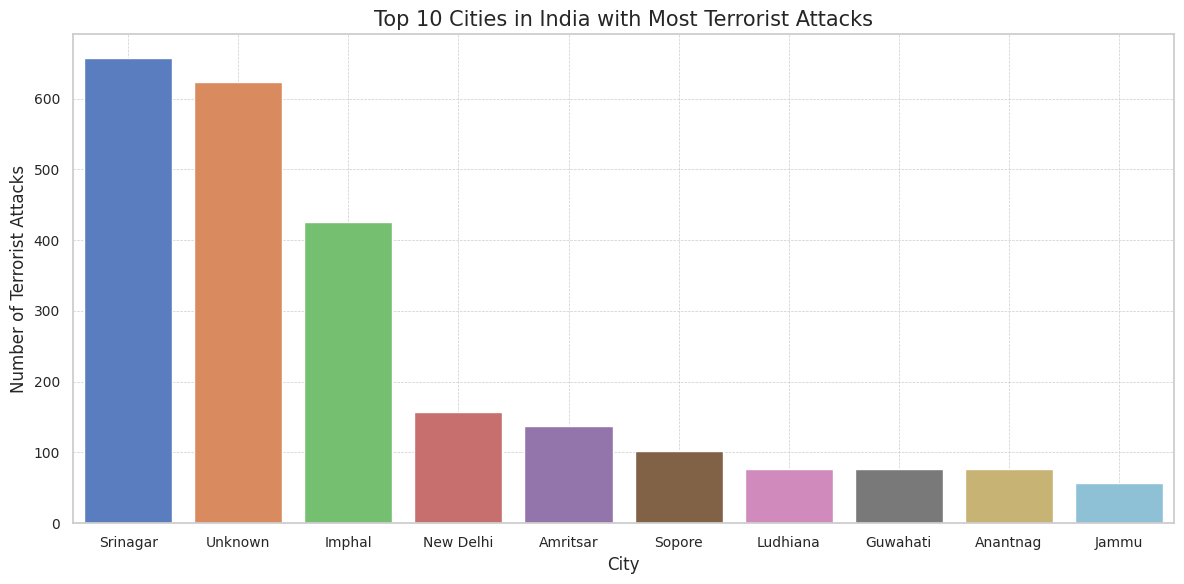

In [ ]:
# Filtering the dataset for terrorist attacks in India
india_terror = terror[terror['country'] == 'India']

# Getting the top 10 cities in India with the most terrorist attacks
indian_city = india_terror.city.value_counts().head(10)

# Suppressing warnings
warnings.filterwarnings("ignore")

# Setting the figure size
plt.figure(figsize=(12, 6))

# Setting the theme for the plot
sns.set_theme(style="whitegrid")

# Creating a bar plot
sns.barplot(y=indian_city.values, x=indian_city.index, palette='muted')

# Adding title and labels
plt.title('Top 10 Cities in India with Most Terrorist Attacks', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Terrorist Attacks', fontsize=12)

# Adjusting tick labels and adding grid lines
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensuring the layout fits well
plt.tight_layout()

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?


Bar charts are used for their clarity, ease of comparison, and ability to effectively display categorical data frequencies


Answer Here.

##### 2. What is/are the insight(s) found from the chart?


In India, Srinagar is the location with the highest number of terrorist attacks, totaling 658 incidents.



```
# This is formatted as code
```

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, there are insights that can lead to negative growth, particularly in regions heavily affected by terrorism. For example, high numbers of terrorist attacks can result in several adverse impacts:

**Economic Decline**

**Increased Security Costs**

**Loss of Human Capita**

**Social Instability**

#### Chart - 8

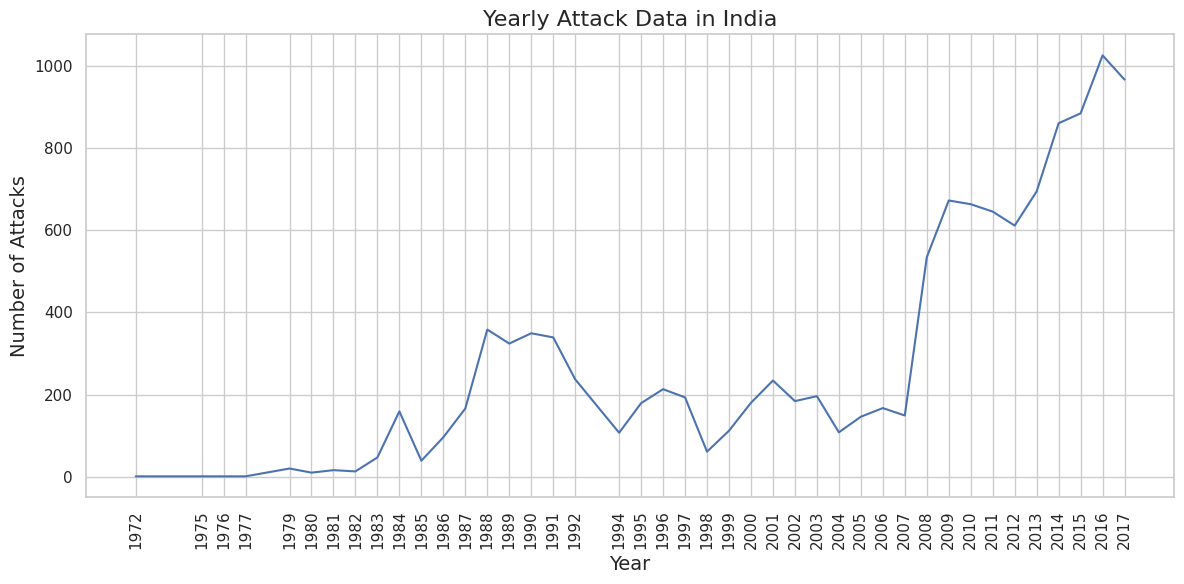

In [ ]:
# Chart - 8 visualization code

attack_yearwise_india = india_terror.year.value_counts()

# Set the style for the plot
sns.set(style='whitegrid')  # You can also try 'darkgrid', 'white', 'dark', 'ticks'

# Create the lineplot
plt.figure(figsize=(12, 6))  # Set the figure size for better clarity
lineplot = sns.lineplot(x=attack_yearwise_india.index, y=attack_yearwise_india.values)

# Set the title and labels
lineplot.set_title('Yearly Attack Data in India', fontsize=16)
lineplot.set_xlabel('Year', fontsize=14)
lineplot.set_ylabel('Number of Attacks', fontsize=14)

# Customize x-ticks to show all years and rotate them for better readability if necessary
plt.xticks(ticks=attack_yearwise_india.index, rotation=90)

# Optionally, set a tight layout
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

visualize data changes over time, revealing patterns, trends, and correlations. They help identify upward or downward trends, seasonal variations, and anomalies, providing valuable insights for forecasting and decision-making. Trend plots are particularly useful for time series analysis, facilitating data interpretation and strategic planning.

##### 2. What is/are the insight(s) found from the chart?

From 2007 to 2017, there was a significant increase in the number of terrorist attacks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Growth Insights**

Enhanced Security Measures

Informed Decision-Making

**Negative Growth Insights**

Reduced Investment and Tourism

Social and Political Instability




#### Chart - 9 - Correlation Heatmap

<Axes: >

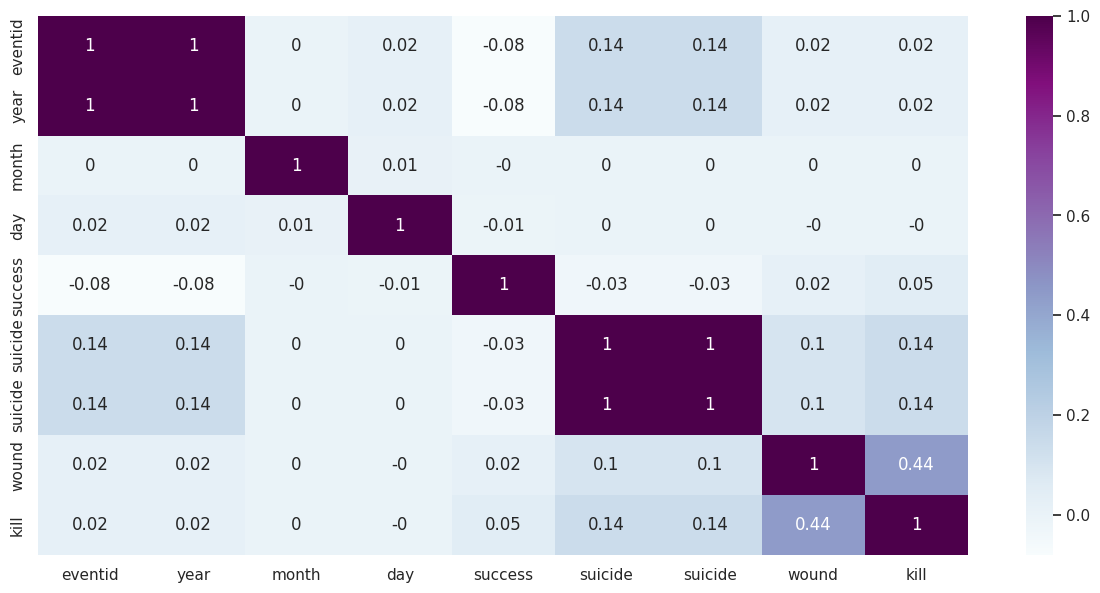

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,7))

#selecting the numeric datypes columns from the terror dataframe
numeric_cols = terror.select_dtypes(include=[np.number])

#we are corelating the numeric column
corr_matrix = numeric_cols.corr()

#this wills show the relations between the variables
sns.heatmap(np.round(corr_matrix,2), annot= True, cmap= 'BuPu')

##### 1. Why did you pick the specific chart?


* Insight: A heatmap allows you to quickly and easily see how variables are related to one another.
* Impact: Understanding these relationships can help identify which factors are most closely associated with outcomes like the number of attacks, fatalities, and injuries.

##### 2. What is/are the insight(s) found from the chart?


* The variables **wound** and **kill** exhibit the strongest correlation among all the variables, with a correlation coefficient of **0.44**. Although this indicates a positive relationship, the magnitude of the correlation is relatively weak. Correlation values range from -1 to 1, where -1 represents a perfect negative correlation, 1 represents a perfect positive correlation, and 0 indicates no correlation.Answer Here

# **Conclusion**



*   country with the most attacks : Iraq

*   Region with most aatacks : Middle East & North Africa


*  Year with the most attacks and most people killed : 2014
*  Most of the attack were not even recognized by any group
*  Most attack types : Bombing / Expliosion

*  highest no of attacks in india has been in year 2016


*  Srinagar is the city in india with the most terror attacks

*  Out Of the total number of Terror attacks, 89% were successfully executed.
















***HOTZONE OF TERRORISM : IRAQ***

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***